In [79]:
import pandas as pd
import numpy as np
# from numpy import NaN as npNaN
import matplotlib.pyplot as plt
from textblob import TextBlob
import talib as tl
import yfinance as yf
import pynance as pyn
# import pandas_ta as ta

# import os,sys
# sys.path.append(os.path.abspath(os.path.join('..')))

# from scripts.utils import *

Reading The Csv File`

In [80]:
tesla_df = pd.read_csv('../data/finance_data/TSLA_historical_data.csv')
tesla_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,2010-06-29,1.266667,1.666667,1.169333,1.592667,1.592667,281494500,0.0,0.0
1,2010-06-30,1.719333,2.028000,1.553333,1.588667,1.588667,257806500,0.0,0.0
2,2010-07-01,1.666667,1.728000,1.351333,1.464000,1.464000,123282000,0.0,0.0
3,2010-07-02,1.533333,1.540000,1.247333,1.280000,1.280000,77097000,0.0,0.0
4,2010-07-06,1.333333,1.333333,1.055333,1.074000,1.074000,103003500,0.0,0.0


In [81]:
tsla = yf.Ticker('TSLA')
tsla

yfinance.Ticker object <TSLA>

In [82]:
tsla.info

{'address1': '1 Tesla Road',
 'city': 'Austin',
 'state': 'TX',
 'zip': '78725',
 'country': 'United States',
 'phone': '512 516 8177',
 'website': 'https://www.tesla.com',
 'industry': 'Auto Manufacturers',
 'industryKey': 'auto-manufacturers',
 'industryDisp': 'Auto Manufacturers',
 'sector': 'Consumer Cyclical',
 'sectorKey': 'consumer-cyclical',
 'sectorDisp': 'Consumer Cyclical',
 'longBusinessSummary': 'Tesla, Inc. designs, develops, manufactures, leases, and sells electric vehicles, and energy generation and storage systems in the United States, China, and internationally. The company operates in two segments, Automotive, and Energy Generation and Storage. The Automotive segment offers electric vehicles, as well as sells automotive regulatory credits; and non-warranty after-sales vehicle, used vehicles, body shop and parts, supercharging, retail merchandise, and vehicle insurance services. This segment also provides sedans and sport utility vehicles through direct and used vehic

In [83]:
hist = tsla.history(period='max')
hist.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-08-27 00:00:00-04:00,213.250000,215.660004,206.940002,209.210007,62821400,0.0,0.0
2024-08-28 00:00:00-04:00,209.720001,211.839996,202.589996,205.750000,64116400,0.0,0.0
2024-08-29 00:00:00-04:00,209.800003,214.889999,205.970001,206.279999,62308800,0.0,0.0
2024-08-30 00:00:00-04:00,208.630005,214.570007,207.029999,214.110001,63246000,0.0,0.0
2024-09-03 00:00:00-04:00,215.253006,219.899994,212.830002,213.869995,17983412,0.0,0.0


Simple Moving Average to smooth the price data

In [84]:
tesla_df['SMA_100'] = tl.SMA(tesla_df['Close'], timeperiod=100)

In [85]:
tesla_df.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100
3445,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,0.0,0.0,219.6867
3446,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,0.0,0.0,218.9289
3447,2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500,0.0,0.0,218.1674
3448,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700,0.0,0.0,217.3943
3449,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,0.0,0.0,216.6623
...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119


Relative Strength Index (RSI)

In [86]:
tesla_df['RSI'] = tl.RSI(tesla_df['Close'], timeperiod=14)

In [87]:
tesla_df.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100,RSI
3445,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,0.0,0.0,219.6867,35.607311
3446,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,0.0,0.0,218.9289,33.642587
3447,2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500,0.0,0.0,218.1674,36.416369
3448,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700,0.0,0.0,217.3943,36.261858
3449,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,0.0,0.0,216.6623,31.257115
...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056,44.886918
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817,46.951389
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983,46.752165
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119,52.664511


Moving Average Convergence Divergence (MACD)

In [88]:
tesla_df['MACD'], tesla_df['MACD_Signal'], tesla_df['MACD_Hist'] = tl.MACD(tesla_df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)


In [89]:
tesla_df.tail(100)

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100,RSI,MACD,MACD_Signal,MACD_Hist
3445,2024-03-07,174.350006,180.039993,173.699997,178.649994,178.649994,102129000,0.0,0.0,219.6867,35.607311,-5.124990,-4.074178,-1.050812
3446,2024-03-08,181.500000,182.729996,174.699997,175.339996,175.339996,85315300,0.0,0.0,218.9289,33.642587,-5.870812,-4.433505,-1.437307
3447,2024-03-11,175.449997,182.869995,174.800003,177.770004,177.770004,85391500,0.0,0.0,218.1674,36.416369,-6.194395,-4.785683,-1.408712
3448,2024-03-12,177.770004,179.429993,172.410004,177.539993,177.539993,87391700,0.0,0.0,217.3943,36.261858,-6.395672,-5.107681,-1.287991
3449,2024-03-13,173.050003,176.050003,169.149994,169.479996,169.479996,106524500,0.0,0.0,216.6623,31.257115,-7.123444,-5.510833,-1.612611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056,44.886918,11.789291,15.873789,-4.084498
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817,46.951389,9.353206,14.569672,-5.216466
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983,46.752165,7.302106,13.116159,-5.814053
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119,52.664511,6.593101,11.811547,-5.218447


Visualize the Indicators`

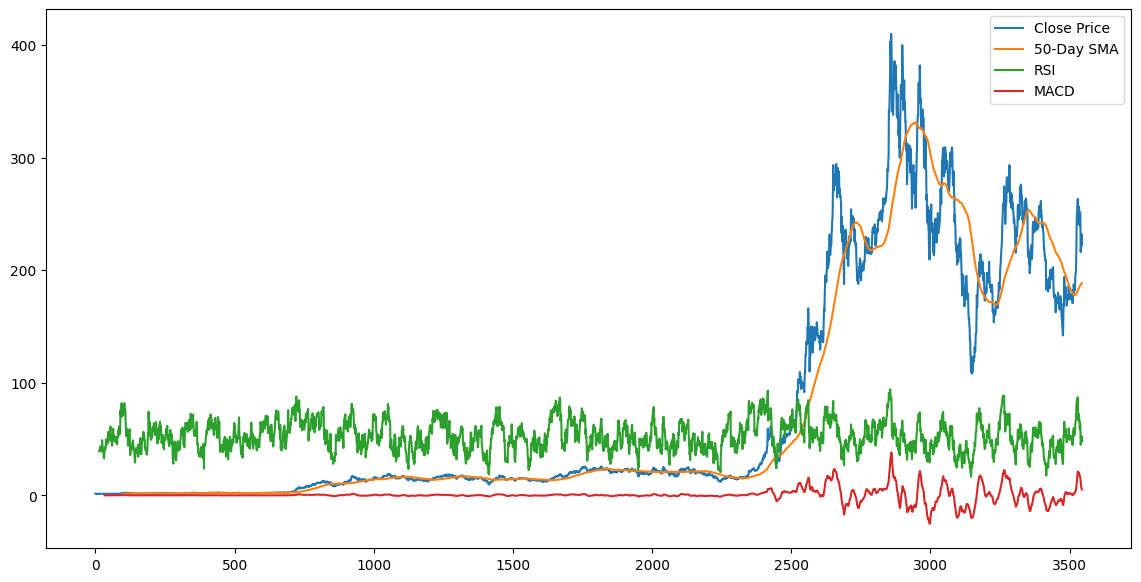

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14,7))
plt.plot(tesla_df['Close'], label='Close Price')
plt.plot(tesla_df['SMA_100'], label='50-Day SMA')
plt.plot(tesla_df['RSI'], label='RSI')
plt.plot(tesla_df['MACD'], label='MACD')
plt.legend()
plt.show()


Pynance

Calculating Financial Metrics

Moving Averages

In [91]:
# Calculate 50-day and 200-day moving averages
tesla_df['50_MA_P'] = tesla_df['Close'].rolling(window=50).mean()


In [92]:
tesla_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100,RSI,MACD,MACD_Signal,MACD_Hist,50_MA_P
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056,44.886918,11.789291,15.873789,-4.084498,202.1838
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817,46.951389,9.353206,14.569672,-5.216466,203.1510
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983,46.752165,7.302106,13.116159,-5.814053,203.9960
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119,52.664511,6.593101,11.811547,-5.218447,205.1582
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,188.4727,48.220474,5.206237,10.490485,-5.284248,206.1138


Relative Strength Index (RSI)

In [93]:
# Calculate RSI
def calculate_rsi(series, period=14):
    delta = series.diff(1)
    gain = (delta.where(delta > 0, 0)).fillna(0)
    loss = (-delta.where(delta < 0, 0)).fillna(0)

    avg_gain = gain.rolling(window=period).mean()
    avg_loss = loss.rolling(window=period).mean()

    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))

    return rsi

tesla_df['RSI_p'] = calculate_rsi(tesla_df['Close'])



In [94]:
tesla_df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,SMA_100,RSI,MACD,MACD_Signal,MACD_Hist,50_MA_P,RSI_p
3540,2024-07-24,225.419998,225.990005,214.710007,215.990005,215.990005,167942900,0.0,0.0,187.0056,44.886918,11.789291,15.873789,-4.084498,202.1838,37.467021
3541,2024-07-25,216.800003,226.000000,216.229996,220.250000,220.250000,100636500,0.0,0.0,187.1817,46.951389,9.353206,14.569672,-5.216466,203.1510,37.015195
3542,2024-07-26,221.190002,222.279999,215.330002,219.800003,219.800003,94604100,0.0,0.0,187.4983,46.752165,7.302106,13.116159,-5.814053,203.9960,36.126924
3543,2024-07-29,224.899994,234.270004,224.699997,232.100006,232.100006,129201800,0.0,0.0,188.0119,52.664511,6.593101,11.811547,-5.218447,205.1582,37.646106
3544,2024-07-30,232.250000,232.410004,220.000000,222.619995,222.619995,100560300,0.0,0.0,188.4727,48.220474,5.206237,10.490485,-5.284248,206.1138,34.476693


In [99]:
# Calculate MACD


# Calculate the 12-day EMA
tesla_df['EMA_12'] = tesla_df['Close'].ewm(span=12, adjust=False).mean()

# Calculate the 26-day EMA
tesla_df['EMA_26'] = tesla_df['Close'].ewm(span=26, adjust=False).mean()

# Calculate the MACD Line
tesla_df['MACD_Line'] = tesla_df['EMA_12'] - tesla_df['EMA_26']

# Calculate the Signal Line (9-day EMA of MACD Line)
tesla_df['Signal_Line'] = tesla_df['MACD_Line'].ewm(span=9, adjust=False).mean()

# Calculate the MACD Histogram
tesla_df['MACD_Histogram'] = tesla_df['MACD_Line'] - tesla_df['Signal_Line']

# Display the first few rows to see the calculated values
print(tesla_df[['Close', 'EMA_12', 'EMA_26', 'MACD_Line', 'Signal_Line', 'MACD_Histogram']].head())


      Close    EMA_12    EMA_26  MACD_Line  Signal_Line  MACD_Histogram
0  1.592667  1.592667  1.592667   0.000000     0.000000        0.000000
1  1.588667  1.592052  1.592371  -0.000319    -0.000064       -0.000255
2  1.464000  1.572351  1.582862  -0.010510    -0.002153       -0.008357
3  1.280000  1.527374  1.560428  -0.033053    -0.008333       -0.024720
4  1.074000  1.457624  1.524396  -0.066772    -0.020021       -0.046751


Visualizing Financial Metrics

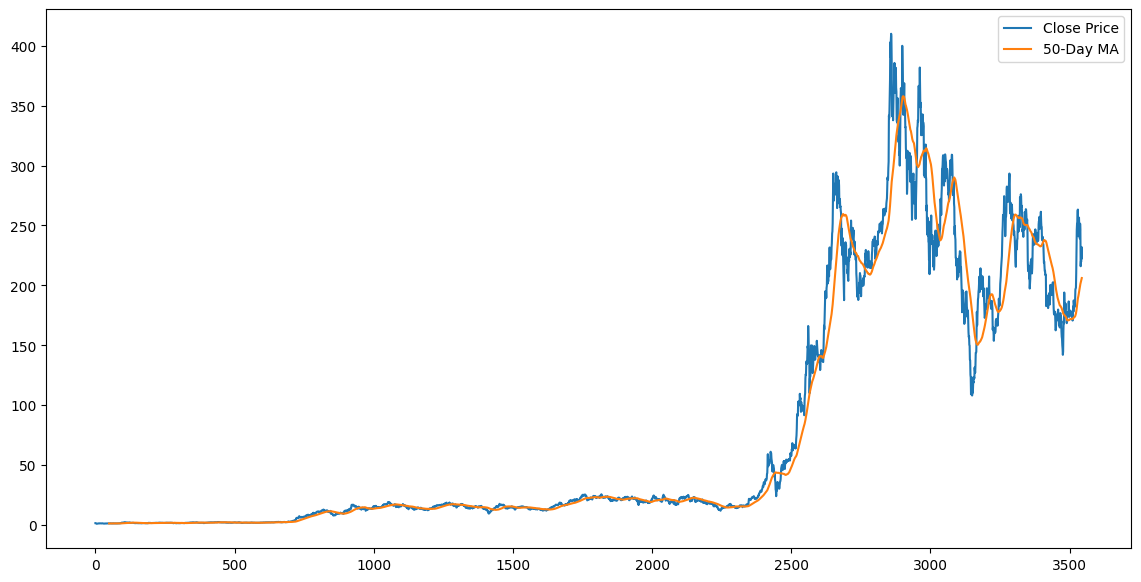

In [106]:
plt.figure(figsize=(14, 7))

# Plot closing prices
plt.plot(tesla_df.index, tesla_df['Close'], label='Close Price')

# Plot 50-day and 200-day moving averages
plt.plot(tesla_df.index, tesla_df['50_MA_P'], label='50-Day MA')
plt.legend()

plt.show()


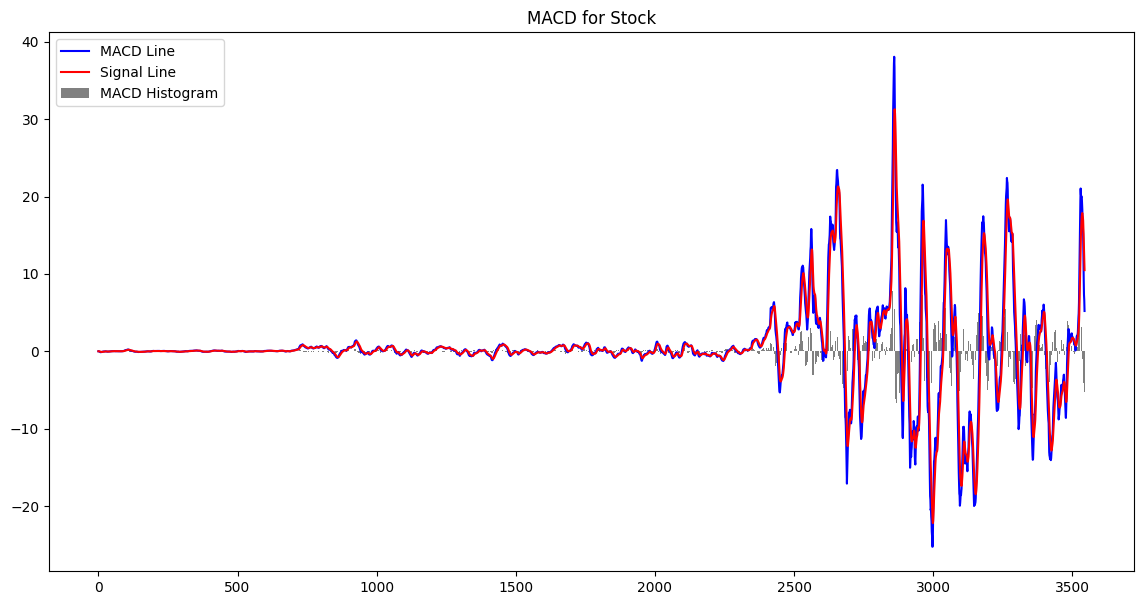

In [107]:
plt.figure(figsize=(14, 7))

# Plot MACD Line
plt.plot(tesla_df.index, tesla_df['MACD_Line'], label='MACD Line', color='blue')
plt.plot(tesla_df.index, tesla_df['Signal_Line'], label='Signal Line', color='red')
plt.bar(tesla_df.index, tesla_df['MACD_Histogram'], label='MACD Histogram', color='grey')

plt.legend(loc='upper left')
plt.title('MACD for Stock')
plt.show()
